In [1]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.io.arff

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# carregando o dataset
data, meta = scipy.io.arff.loadarff(f'data/electricity-normalized.arff')
df = pd.DataFrame(data)

# Convertendo byte-strings para strings
str_df = df.select_dtypes([object]).stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

# ajeitar o tipo dos dados
nominal_cols = [col for col, dtype in zip(meta.names(), meta.types()) if dtype == 'nominal']
for col in nominal_cols:
    df[col] = df[col].astype('category')

df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


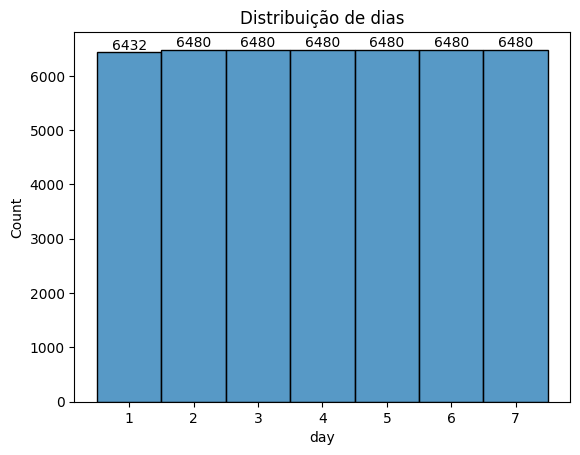

In [3]:
ax = sns.histplot(df['day'])

for container in ax.containers:
    ax.bar_label(container)

plt.title("Distribuição de dias")
plt.show()

Percebe-se que o primeiro dia da semana 48 instâncias a menos, porque a coleta começou no dia 2 da semana como é visto no head dataframe mostrado acima e como os dados são coletados a cada 30 minutos, 48 instâncias equivale a 1 dia.

In [4]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.columns

Index(['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand',
       'transfer'],
      dtype='object')

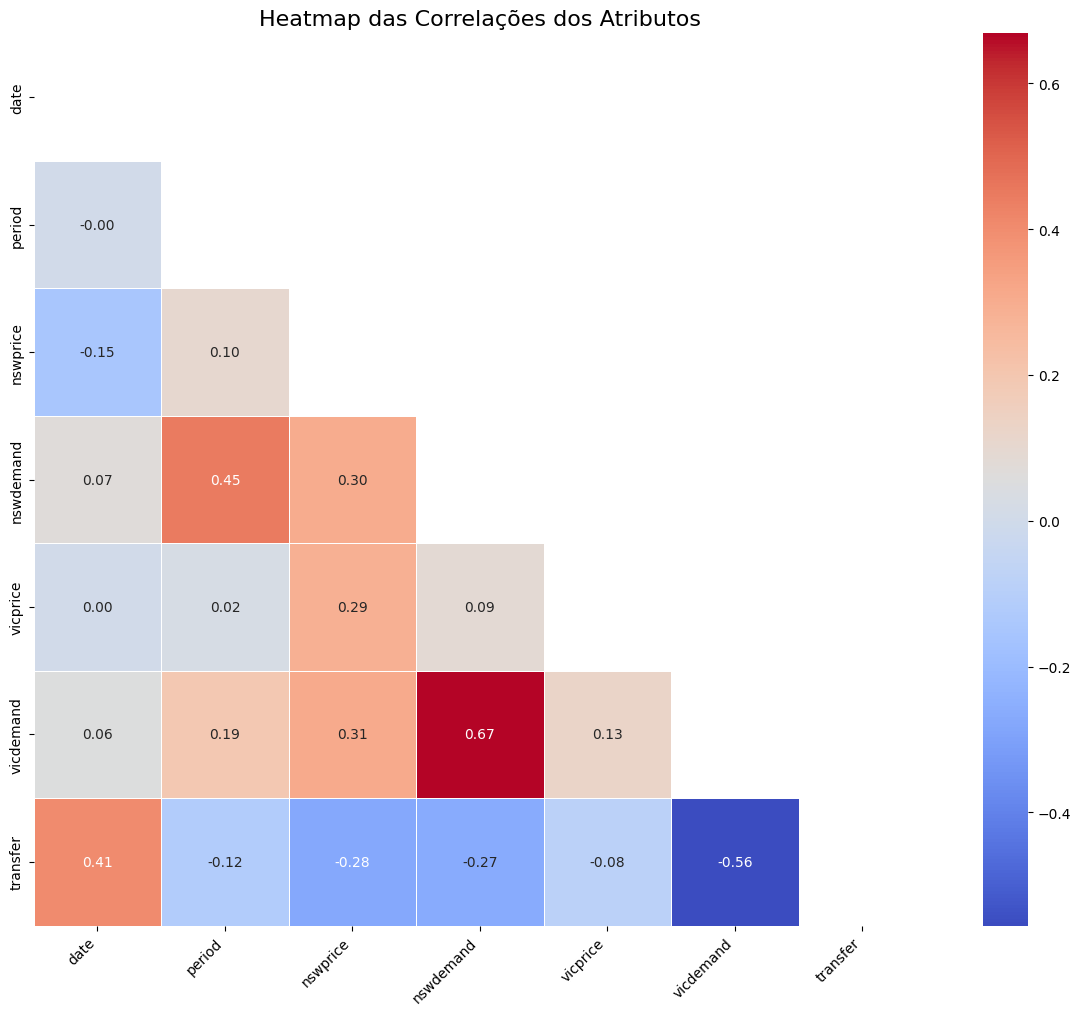

In [8]:
threshold = 0.0

corr_matrix = numeric_cols.corr()

masked_corr = corr_matrix.copy()
np.fill_diagonal(masked_corr.values, np.nan)

significant_columns = masked_corr.columns[
    (masked_corr.abs() > threshold).any(axis=0)
]

filtered_corr_matrix = corr_matrix.loc[significant_columns, significant_columns]

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))
sns.heatmap(
    filtered_corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    annot_kws={'size':10}
)

plt.title("Heatmap das Correlações dos Atributos", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

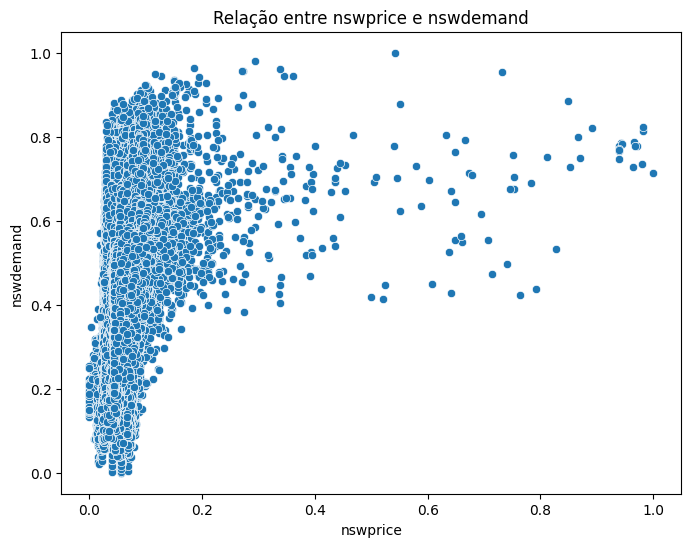

In [11]:
# Supondo que seu DataFrame seja chamado df
plt.figure(figsize=(8, 6))

# Cria um scatter plot e adiciona uma linha de regressão
sns.scatterplot(data=df, x='nswprice', y='nswdemand')

plt.title('Relação entre nswprice e nswdemand')
plt.xlabel('nswprice')
plt.ylabel('nswdemand')
plt.show()

Esse gráfico mostra que quando a demanda está baixa na região de New South Wales o preço consequentemente está baixo, porém essa relação não mantém quando a demanda aumenta o preço fica mais variável nessa situação.

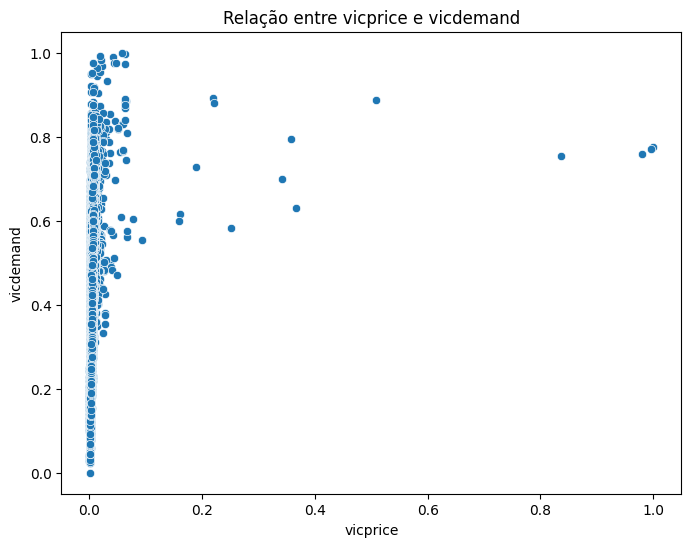

In [12]:
# Supondo que seu DataFrame seja chamado df
plt.figure(figsize=(8, 6))

# Cria um scatter plot e adiciona uma linha de regressão
sns.scatterplot(data=df, x='vicprice', y='vicdemand')

plt.title('Relação entre vicprice e vicdemand')
plt.xlabel('vicprice')
plt.ylabel('vicdemand')
plt.show()

Em Victoria ocorre uma situação parecida, porém os valores são mais contrastantes em comparação com New South Wales que tem uma distribuição maior.

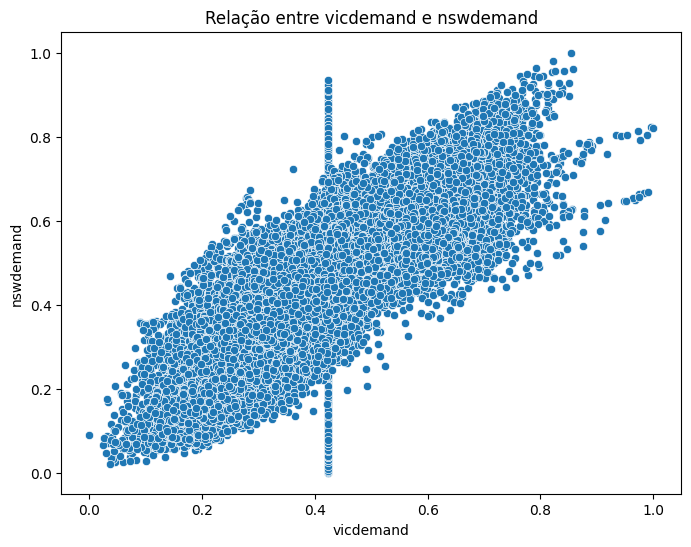

In [13]:
# Supondo que seu DataFrame seja chamado df
plt.figure(figsize=(8, 6))

# Cria um scatter plot e adiciona uma linha de regressão
sns.scatterplot(data=df, x='vicdemand', y='nswdemand')

plt.title('Relação entre vicdemand e nswdemand')
plt.xlabel('vicdemand')
plt.ylabel('nswdemand')
plt.show()

Na matriz de correlação, percebe-se que nswdemand e vicdemand tem uma alta correlação, fato que se comprova na distribuição desse gráfico. Um fato que chama atenção é quando a demanda de Victoria está num patamar próximo 0.4, que foge um pouco do padrão de correlação.

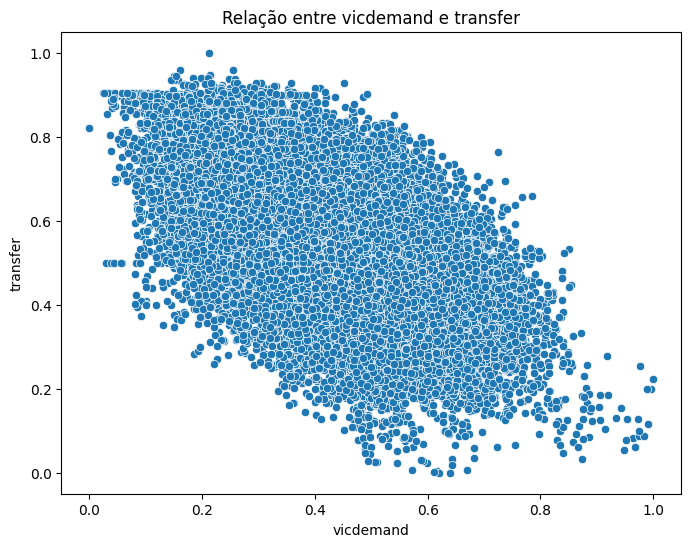

In [14]:
# Supondo que seu DataFrame seja chamado df
plt.figure(figsize=(8, 6))

# Cria um scatter plot e adiciona uma linha de regressão
sns.scatterplot(data=df, x='vicdemand', y='transfer')

plt.title('Relação entre vicdemand e transfer')
plt.xlabel('vicdemand')
plt.ylabel('transfer')
plt.show()

Outra correlação interessante é entre transfer e vicdemand, nesse caso negativa, que sugere que quanto a maior a demanda de Victoria menor é a taxa de transferência entre os estados

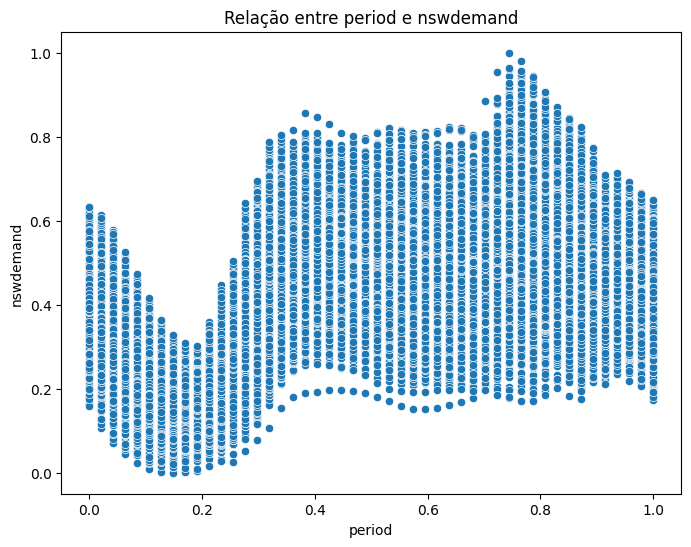

In [15]:
# Supondo que seu DataFrame seja chamado df
plt.figure(figsize=(8, 6))

# Cria um scatter plot e adiciona uma linha de regressão
sns.scatterplot(data=df, x='period', y='nswdemand')

plt.title('Relação entre period e nswdemand')
plt.xlabel('period')
plt.ylabel('nswdemand')
plt.show()